#### Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load your data into the notebook
df = pd.read_csv('data/Automobile_data.csv')

## Exploring the data, cleaning the data, and visualizing the data.
### Exploring the data


In [3]:
# View the first few rows of the data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
# View summary statistics of the data
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# DATA WRANGLING

### a) Handle missing field values such as drop, replace by mean, replace by frequency

Replacing the "?" values with NaN

In [6]:
df.replace("?",np.NaN, inplace=True)

### Finding missing data

In [7]:
#checking for anymore missing data
df.isnull().sum()

# using a for loop
for column in df.columns:
    print(column)
    print(df[column].isnull().sum())

symboling
0
normalized-losses
41
make
0
fuel-type
0
aspiration
0
num-of-doors
2
body-style
0
drive-wheels
0
engine-location
0
wheel-base
0
length
0
width
0
height
0
curb-weight
0
engine-type
0
num-of-cylinders
0
engine-size
0
fuel-system
0
bore
4
stroke
4
compression-ratio
0
horsepower
2
peak-rpm
2
city-mpg
0
highway-mpg
0
price
4


### Handling the missing data

In [8]:
# delete all row where price is missing
df.dropna(subset = ["price"], inplace = True, axis = 0)
## reset index
df.reset_index(drop=True, inplace=True)

In [9]:
#replacing empty normalized losses with mean
average_normalized_loss = df["normalized-losses"].astype("float").mean()
df["normalized-losses"].replace(np.nan, average_normalized_loss, inplace = True)

In [10]:
#replacing empty stroke with mean
average_stroke = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, average_stroke, inplace = True)

In [11]:
#replacing null values in bore column with the mean
average_bore = df["bore"].astype("float").mean(axis = 0)
df["bore"].replace(np.nan, average_bore, inplace=True)

In [12]:
#replacing null values in horsepower with mean
average_horsepower = df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan, average_horsepower, inplace= True)

In [13]:
#replacing null values in peak-rpm with mean
average_horsepower = df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.nan, average_horsepower, inplace= True)

In [14]:
#replacing null values in num-of-doors with most frequent num-of-do
most_frequent_numofdoor = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, most_frequent_numofdoor, inplace=True)

In [15]:
#check whether there are any null values after handling missing data
df.isnull().sum().sum()

0

### Correct data format

In [16]:
# You can use the dtypes attribute of a pandas dataframe to check the data type of each column.
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [17]:
# converting the data types to correct format
df[['bore','stroke','price', 'peak-rpm']] = df[['bore','stroke','price', 'peak-rpm']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data standardization

In [18]:
# Strandardizing the fule consumption column(city-mpg) from mpg to l/100km
df["city-L/100km"] = 235/df["city-mpg"]

In [19]:
#standardizing the column, highway-mpg to highway-l/100km
df["highway-L/100km"] = 253/df['highway-mpg']

### Data normalization

In [20]:
# normalizing width,height and length
df["length"] = df["length"]/df["length"].max() 
df["height"] = df["height"]/df["height"].max()
df["width"] = df["width"]/df["width"].max()

### Binning 

In [21]:
## convert data to correct format
df["horsepower"] = df["horsepower"].astype("float", copy=True)

Text(0.5, 1.0, 'Horsepower distribution')

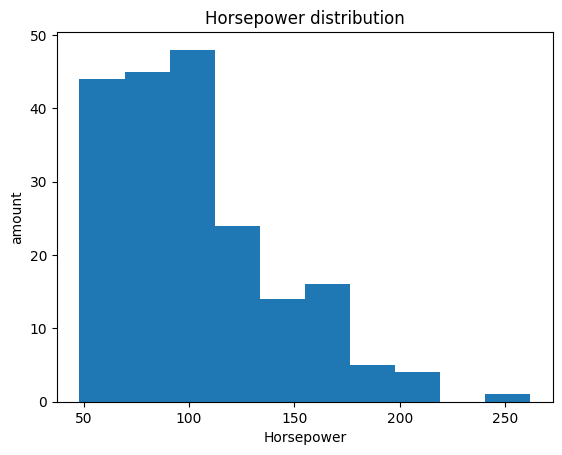

In [22]:
## visualizing horsepower distribution
plt.hist(df["horsepower"])

plt.xlabel("Horsepower")
plt.ylabel("amount")
plt.title("Horsepower distribution")

In [23]:
# constructing the bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [24]:
#setting the group names
g_names = ["low","medium","high"]

In [25]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=g_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low


In [26]:
#number of vehicles in each bin
df["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Bin vizualization')

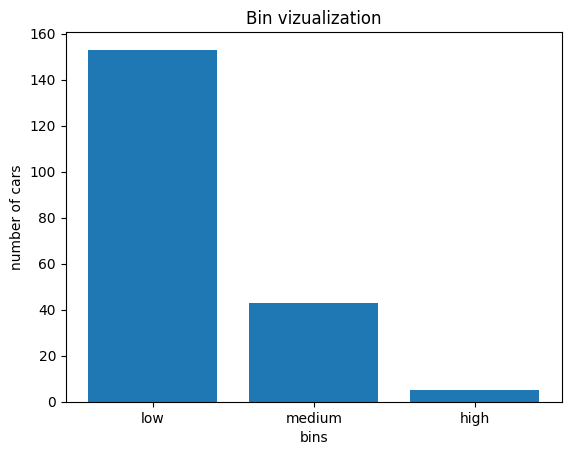

In [27]:
# plot the distribution of each bin
plt.bar(g_names, df["horsepower-binned"].value_counts())
plt.xlabel("bins")
plt.ylabel("number of cars")
plt.title("Bin vizualization")

### Dummy variables 

In [28]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [29]:
dummy_var_1 = pd.get_dummies(df["fuel-type"])
dummy_var_1.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
# renaming the columns
dummy_var_1.rename(columns={"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace=True)
dummy_var_1.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# # merge data frame and "dummy_var_1" 
df = pd.concat([df, dummy_var_1], axis= 1)

#drop initial fuel type from data
df.drop(labels="fuel-type", inplace=True, axis=1)

In [ ]:
## saving the new dataframe
df.to_csv("data/cleandf.csv")